# Bagaimana Cara Meningkatkan Layanan Pelanggan di Pusat Kebugaran?

Waralaba pusat kebugaran bernama Model Fitness sedang mengembangkan strategi keterlibatan pelanggan berdasarkan data analitik.󠀲󠀡󠀥󠀥󠀧󠀧󠀨󠀤󠀳
󠀰Salah satu masalah yang paling sering dijumpai oleh layanan pusat kebugaran dan bahkan layanan lainnya adalah perputaran pelanggan atau *customer churn*.󠀲󠀡󠀥󠀥󠀧󠀧󠀨󠀥󠀳󠀰 

Indikator *churn* bisa berbeda dari satu bidang ke bidang lainnya. Bagi bisnis pusat kebugaran, pelanggan akan dianggap pergi jika mereka tidak lagi kembali selama satu bulan.󠀲󠀡󠀥󠀥󠀧󠀧󠀩󠀢󠀳󠀰 Biasanya jika seorang pelanggan memutuskan untuk bergabung, kemudian datang beberapa kali lalu menghilang, kemungkinan besar pelanggan tersebut tidak akan kembali lagi.

󠀰Untuk mengurangi tingkat *churn*, Model Fitness telah melakukan digitalisasi terhadap sejumlah profil pelanggannya.󠀲󠀡󠀥󠀥󠀧󠀧󠀩󠀥󠀳󠀰 Adapun tugas kita adalah menganalisis profil para pelanggan tersebut dan mengembangkan strategi retensi pelanggan (*customer retention*).

**KONTEN**

* [Pendahuluan]
* [Tahap 1. Eksplorasi Data]
    * [1.1 Inisialisasi]
    * [1.2 Memuat Data]
    * [1.3 Mempersiapkan Data]
    * [1.4 Kesimpulan dan Langkah Selanjutnya]
* [Tahap 2. Pra-pemrosesan Data]   
    * [2.1 Memperbaiki Nama Kolom]
    * [2.2 Mengatasi duplikat]
    * [2.3 Kesimpulan dan Langkah Selanjutnya]
* [Tahap 3. Analisa Data]
    * [3.1 Nilai Rata-rata dan Standar Deviasi]
    * [3.2 Nilai Fitur Rata-rata dalam Dua Kelompok *Churn*]
    * [3.3 Matriks Korelasi]
    * [3.4 Kesimpulan dan Langkah Selanjutnya]
* [Tahap 4. Penerapan *Machine Learning*]
    * [4.1 *Train Set* dan *Validation Set*]
    * [4.2 Melatih Model]
        * [4.2.1 Regresi Logistik]
        * [4.2.2 *Random Forest*]
    * [4.3 Membuat Klaster Pengguna]
        * [4.3.1 Standarisasi Data]
        * [4.3.2 Jumlah Klaster yang Dapat Dipilih]
        * [4.3.3 Nilai Rata-rata dan Distribusi Fitur untuk Semua Klaster]
        * [4.3.4 Tingkat *Churn* Setiap Klaster]
    * [4.4 Kesimpulan]   
* [Kesimpulan Umum]

## Pendahuluan

Dalam proyek kali ini, kita akan mempelajari dan menganalisis profil para pelanggan pusat kebugaran bernama Model Fitness, dan mengembangkan strategi retensi pelanggan (*customer retention*). Kita akan mempelajari cara memprediksi probabilitas *churn* (untuk bulan berikutnya) bagi setiap pelanggan, menganalisis faktor dan mengidentifikasikan kelompok target serta memberikan rekomendasi terkait cara meningkatkan layanan pelanggan.

### Tujuan:

Menganalisis profil para pelanggan pusat kebugaran Model Fitness dan mengembangkan strategi retensi pelanggan (*customer retention*).

### Tahapan

Dataset yang kita miliki saat ini berisi data tingkat *churn* pelanggan untuk bulan tertentu dan informasi tentang bulan sebelumnya dan disimpan dalam *file* berikut: `/datasets/gym_churn_us.csv`.

Pertama, karena tidak ada informasi terkait kualitas data tersebut, kita perlu memeriksanya terlebih dahulu. Kita akan melakukan pra-pemrosesan data, dan mencoba mengatasi masalah yang muncul pada data tersebut, seperti nilai yang hilang, duplikasi, dan sebagainya. Kemudian, dalam tahap analisa data dan penerapan pemodelan, kita akan melakukan beberapa tahapan, yaitu:
 * Mempelajari cara memprediksi probabilitas *churn* (untuk bulan berikutnya) bagi setiap pelanggan.
 * Membuat segmentasi pengguna dengan memilih kelompok yang paling dominan dan mendeskripsikan fitur-fitur utamanya.
 * Menganalisis faktor yang paling memengaruhi *churn*, mengidentifikasi kelompok target dan merekomendasikan langkah-langkah untuk mengurangi *churn*.
 * Menarik kesimpulan dasar dan memberikan rekomendasi terkait cara meningkatkan layanan pelanggan.
 
Terakhir, kita akan menarik kesimpulan berdasarkan data tersebut.
 
Proyek ini akan terdiri dari 4 tahap:
 1. Ikhtisar Data
 2. Pra-pemrosesan Data
 3. Analisa Data
 4. Penerapan *Machine Learning*

## Eksplorasi Data

### Inisialisasi 

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy.stats import spearmanr

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import dendrogram, linkage 


In [77]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.precision', 15)
pd.set_option('display.max_columns', 300)

In [78]:
def feat_hist(x, group_col, key_cols):
    x_new = x.copy()
    x_new[key_cols] = df[key_cols]
    for c in key_cols:
        for cl in x[group_col].unique():
            sns.distplot(x_new[x_new[group_col]==cl][c],
                       label='{} = {}'.format(group_col, str(cl)), bins = 10)
        plt.title(c)
        plt.legend()
        plt.show()

### Memuat Data 

In [79]:
df = pd.read_csv('/datasets/gym_churn_us.csv')

### Mempersiapkan Data 

**Deskripsi data**

Churn — *churn* aktual untuk bulan terkait

Kolom dataset saat ini:

Data pengguna untuk bulan sebelumnya
 * gender
 * Near_Location — apakah pengguna tinggal atau bekerja di dekat lokasi pusat kebugaran
 * Partner — apakah pengguna adalah karyawan perusahaan mitra (pusat kebugaran ini memiliki perusahaan mitra dan para karyawannya berhak untuk mendapatkan diskon; dalam hal ini, pusat kebugaran menyimpan informasi tentang perusahaan tempat kerja pelanggan mereka)
 * Promo_friends — apakah pengguna awalnya melakukan pendaftaran melalui penawaran "ajak teman" (mereka menggunakan kode promo teman saat membayar keanggotaan pertama mereka)
 * Phone — apakah pengguna memberikan nomor telepon mereka
 * Age
 * Lifetime — waktu (dalam bulan) sejak kunjungan pertama pelanggan ke pusat kebugaran
 
Data dari log kunjungan dan pembelian, serta data terkait status keanggotaan saat ini
 * Contract_period — 1 bulan, 3 bulan, 6 bulan, atau 1 tahun
 * Month_to_end_contract — sisa bulan sebelum kontrak berakhir
 * Group_visits — apakah pengguna mengambil bagian dalam sesi kelompok
 * Avg_class_frequency_total —frekuensi rata-rata kunjungan per minggu selama masa hidup (lifetime) pelanggan
 * Avg_class_frequency_current_month — frekuensi rata-rata kunjungan per minggu sepanjang bulan yang sedang berjalan
 * Avg_additional_charges_total — jumlah total uang yang dikeluarkan untuk membayar layanan lain di pusat kebugaran: kafe, barang atletik, kosmetik, pijat, dll.

In [80]:
df

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470422861144,5.0,3,0.020397947620858,0.000000000000000,0
1,0,1,0,0,1,12,1,31,113.202937651058207,12.0,7,1.922936055041820,1.910243521519641,0
2,0,1,1,0,1,1,0,28,129.448479332006144,1.0,2,1.859098347383238,1.736501891634414,0
3,0,1,1,1,1,12,1,33,62.669863191238292,12.0,2,3.205632768238500,3.357214513052662,0
4,1,1,1,1,1,1,0,26,198.362265439036833,1.0,3,1.113884400425780,1.120078107422207,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023033473062,12.0,8,2.284497435436510,2.349069925178636,0
3996,0,1,0,0,1,1,1,29,68.883763964828248,1.0,1,1.277168289948302,0.292858869375928,1
3997,1,1,1,1,1,12,0,28,78.250541574563115,11.0,2,2.786146362854209,2.831439498826259,0
3998,0,1,1,1,1,6,0,32,61.912656912997967,5.0,3,1.630108144816497,1.596236640042139,0


In [81]:
df.shape

(4000, 14)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [83]:
df.isna().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

### Kesimpulan dan Langkah Selanjutnya

Dataset kita memiliki 4000 baris dan 14 kolom.

Kesimpulan sementara:

1. Tidak terdapat nilai yang hilang pada dataset yang kita miliki.
2. Terdapat sedikit masalah pada gaya penulisan nama kolom, yaitu penggunaan huruf yang kurang konsisten dimana terdapat huruf kecil dan kapital, dan perlu diperbaiki pada tahap selanjutnya.

Selanjutnya, kita akan melakukan pra-pemrosesan data.

## Pra-Pemrosesan Data

### Memperbaiki Nama Kolom

In [84]:
df.rename(columns=lambda x: x.lower(), inplace=True)

In [85]:
df

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470422861144,5.0,3,0.020397947620858,0.000000000000000,0
1,0,1,0,0,1,12,1,31,113.202937651058207,12.0,7,1.922936055041820,1.910243521519641,0
2,0,1,1,0,1,1,0,28,129.448479332006144,1.0,2,1.859098347383238,1.736501891634414,0
3,0,1,1,1,1,12,1,33,62.669863191238292,12.0,2,3.205632768238500,3.357214513052662,0
4,1,1,1,1,1,1,0,26,198.362265439036833,1.0,3,1.113884400425780,1.120078107422207,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023033473062,12.0,8,2.284497435436510,2.349069925178636,0
3996,0,1,0,0,1,1,1,29,68.883763964828248,1.0,1,1.277168289948302,0.292858869375928,1
3997,1,1,1,1,1,12,0,28,78.250541574563115,11.0,2,2.786146362854209,2.831439498826259,0
3998,0,1,1,1,1,6,0,32,61.912656912997967,5.0,3,1.630108144816497,1.596236640042139,0


### Mengatasi Duplikat

In [86]:
df.duplicated().sum()

0

### Kesimpulan dan Langkah Selanjutnya

Melalui proses pra-pemrosesan data, kita dapat mengambil kesimpulan:

1. Masalah gaya penulisan nama kolom yang sebelumnya tidak konsisten, sudah diperbaiki dengan menggunakan huruf kecil seluruhnya.
2. Tidak terdapat data yang terduplikasi.

Selanjutnya, kita dapat menggunakan dataset tersebut untuk dianalisis.

## Analisa Data

### Nilai Rata-rata dan Standar Deviasi

In [87]:
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000000000000,4000.000000000000000,4000.00000000000000,4000.000000000000000,4000.000000000000000,4000.00000000000000,4000.000000000000000,4000.000000000000000,4000.000000000000000,4000.000000000000000,4000.000000000000000,4000.000000000000000,4000.000000000000000,4000.000000000000000
mean,0.510250000000000,0.845250000000000,0.48675000000000,0.308500000000000,0.903500000000000,4.68125000000000,0.412250000000000,29.184249999999999,146.943727809250021,4.322750000000000,3.724750000000000,1.879019712534937,1.767051822040508,0.265250000000000
std,0.499957425044087,0.361711412989101,0.49988689643489,0.461931916275352,0.295312634995689,4.54970585789327,0.492301256987942,3.258367102790006,96.355602395679838,4.191297434094276,3.749266820049219,0.972244872030617,1.052905717489531,0.441521429596796
min,0.000000000000000,0.000000000000000,0.00000000000000,0.000000000000000,0.000000000000000,1.00000000000000,0.000000000000000,18.000000000000000,0.148204788456624,1.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000
25%,0.000000000000000,1.000000000000000,0.00000000000000,0.000000000000000,1.000000000000000,1.00000000000000,0.000000000000000,27.000000000000000,68.868829978416670,1.000000000000000,1.000000000000000,1.180875086219582,0.963002948193214,0.000000000000000
50%,1.000000000000000,1.000000000000000,0.00000000000000,0.000000000000000,1.000000000000000,1.00000000000000,0.000000000000000,29.000000000000000,136.220158971036881,1.000000000000000,3.000000000000000,1.832768412113406,1.719574310109868,0.000000000000000
75%,1.000000000000000,1.000000000000000,1.00000000000000,1.000000000000000,1.000000000000000,6.00000000000000,1.000000000000000,31.000000000000000,210.949624655502134,6.000000000000000,5.000000000000000,2.536078338329289,2.510336265936281,1.000000000000000
max,1.000000000000000,1.000000000000000,1.00000000000000,1.000000000000000,1.000000000000000,12.00000000000000,1.000000000000000,41.000000000000000,552.590740386879816,12.000000000000000,31.000000000000000,6.023668475995910,6.146782880452392,1.000000000000000


Melalui tabel di atas, dengan memperhatikan nilai rata-rata (*mean*) dan standar deviasinya (std), kita dapat melihat distribusi nilai pada dataset yang kita miliki ternyata terdapat perbedaan skala yang cukup signifikan antara beberapa kolomnya.

Ketika nilai standar deviasi dari kolom atau fitur dalam dataset memiliki variasi yang signifikan dalam skala dan rentang nilai, ini menunjukkan bahwa distribusi data di kolom tersebut sangat bervariasi. Contohnya, kolom `gender` memiliki nilai standar deviasi dan *mean* sekitar 0.5 atau kurang dari 1, namun, kolom `avg_additional_charges_total` memiliki nilai standar deviasi dan *mean* di angka yang jauh lebih besar dari 1.

Karena tujuan proyek kita adalah untuk membuat pemodelan, hal ini dapat mempengaruhi seleksi fitur yang optimal. Jika variasi fitur sangat tinggi, ini dapat menyebabkan masalah seperti *overfitting* pada model. Mungkin pada tahap selanjutnya kita perlu melakukan analisis lebih lanjut untuk mengeksplorasi apakah ada keterkaitan antara fitur-fitur tersebut dengan target *churn* dan apakah variasi yang tinggi tersebut benar-benar berkaitan dengan karakteristik pelanggan yang berpotensi *churn*.

### Nilai Fitur Rata-rata dalam Dua Kelompok *Churn*

In [88]:
df.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037427696495,0.873086083701939,0.534195304525349,0.353521605988431,0.903708744470908,5.747192922762845,0.464103436543042,29.976522626743790,158.445714801611899,5.283089486219803,4.711806736985369,2.024875642518554,2.027881733095179
1,0.510838831291235,0.768143261074458,0.355325164938737,0.183788878416588,0.902921771913289,1.728557964184731,0.268614514608860,26.989632422243165,115.082898619287263,1.662582469368520,0.990574929311970,1.474994662372977,1.044545593398017


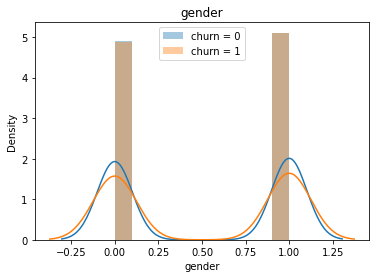

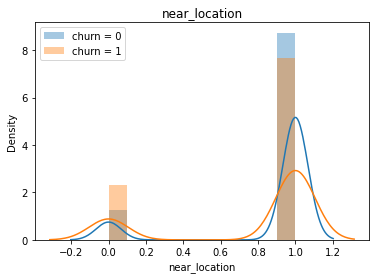

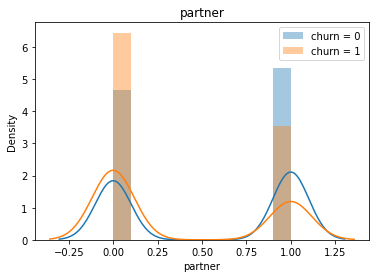

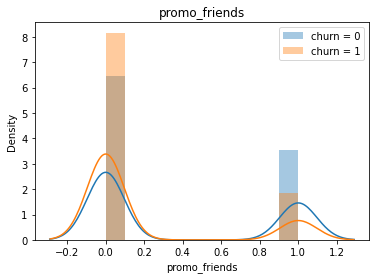

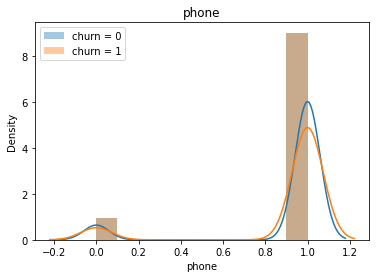

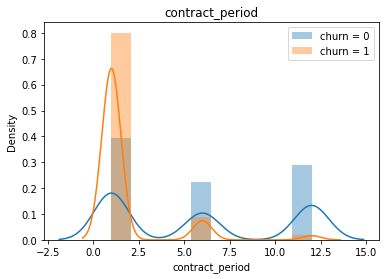

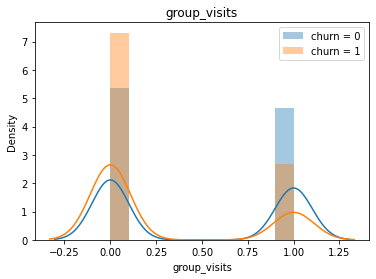

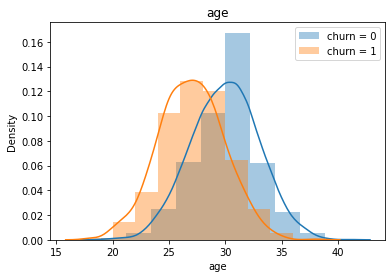

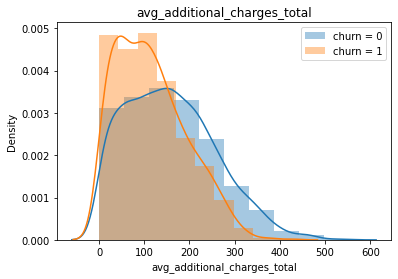

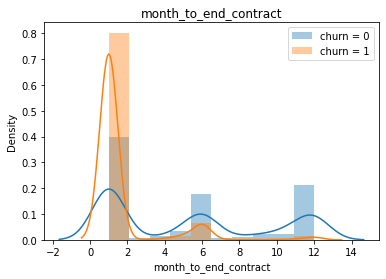

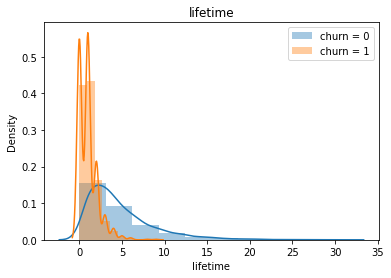

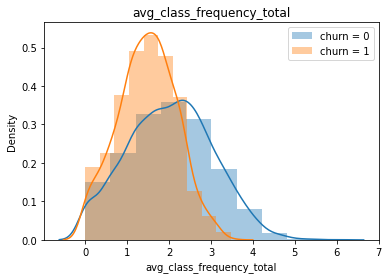

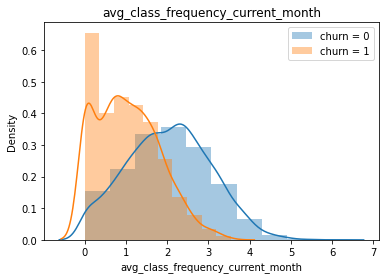

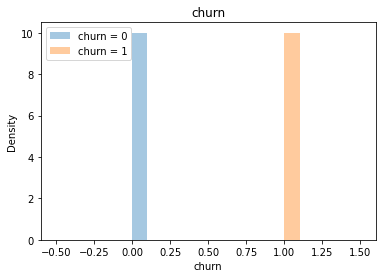

In [89]:
feat_hist(df, 'churn', df.columns)

Melalui tabel dan grafik visualisasi di atas, dapat kita lihat bahwa terdapat beberapa fitur yang mempengaruhi apakah seorang pelanggan cenderung menjadi *customer churn* atau tidak, seperti:

 * Lokasi: pelanggan cenderung memilih tempat *fitness* yang lokasinya dekat dengan mereka dibandingkan yang jauh.
 * Partner: adanya teman membuat pelanggan lebih bertahan lama dan tidak *churn*.
 * Promo mengajak teman: program promo ajak teman rupanya cukup berdampak pada kesetiaan pelanggan pada suatu pusat kebugaran.
 * Periode kontrak dan *Lifetime*: rata-rata pelanggan *churn* hanya bertahan selama 1 bulan saja, sedangkan biasanya yang sudah berlangganan selama 4 bulan ke atas lebih bertahan lama 
 * Sesi kelompok: pelanggan tidak *churn* lebih banyak mengikuti sesi kelompok
 * Frekuensi rata-rata kunjungan, baik selama *lifetime* maupun dalam sebulan: rata-rata frekuensi kunjungan pelanggan *non-churn* (rata-rata 2 kunjungan) lebih tinggi dibandingkan dengan pelanggan *churn* (rata-rata 1 kunjungan)
 * Jumlah total uang yang dikeluarkan: pelanggan *non-churn* cenderung menghabiskan lebih banyak uang di tempat fitness dibandingkan pelanggan *churn*

### Matriks Korelasi

In [90]:
df.corr()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
gender,1.000000000000000,0.006699227595081,-0.010462622250800,-0.005033272441054,-0.008542118064000,0.000502261220279,0.017878940218984,0.013806900920360,-0.009334436022097,-0.001280790522073,0.013578571154470,0.014620159193698,0.009156488375539,0.000707733985153
near_location,0.006699227595081,1.000000000000000,-0.005119431260763,0.210964279250089,-0.015763230257229,0.150232831416567,0.154728047973810,0.058357839446367,0.040761205686103,0.143960652863483,0.070920564055164,0.043127478605891,0.062663633458793,-0.128097990299810
partner,-0.010462622250800,-0.005119431260763,1.000000000000000,0.451959803638693,0.009969610205313,0.306166251238889,0.022709566916954,0.047479698759628,0.022941185300935,0.294632124877685,0.061229353260985,0.024937869800103,0.045561091361999,-0.157985736985098
promo_friends,-0.005033272441054,0.210964279250089,0.451959803638693,1.000000000000000,0.001981592231935,0.244551568070672,0.120169506269850,0.050113307413902,0.036897676000240,0.239553224750288,0.072721100932983,0.028063220773726,0.053768377063076,-0.162233077833515
phone,-0.008542118064000,-0.015763230257229,0.009969610205313,0.001981592231935,1.000000000000000,-0.006893264000346,-0.010099146860770,-0.011403238953259,0.009279431489794,-0.011196256833938,-0.018801227382775,0.008340465501805,0.013374852916164,-0.001176601362480
contract_period,0.000502261220279,0.150232831416567,0.306166251238889,0.244551568070672,-0.006893264000346,1.000000000000000,0.169990834019106,0.138249289429536,0.111445063341492,0.973063587268638,0.170725270972972,0.096211136398092,0.159407376566591,-0.389984211586078
group_visits,0.017878940218984,0.154728047973810,0.022709566916954,0.120169506269850,-0.010099146860770,0.169990834019106,1.000000000000000,0.080933568901738,0.032079086460016,0.163702563158596,0.075852846038239,0.056694752430919,0.075923274727096,-0.175324655498149
age,0.013806900920360,0.058357839446367,0.047479698759628,0.050113307413902,-0.011403238953259,0.138249289429536,0.080933568901738,1.000000000000000,0.080240125272997,0.134511341398497,0.164692820019427,0.119953132113990,0.183094542154536,-0.404735252823589
avg_additional_charges_total,-0.009334436022097,0.040761205686103,0.022941185300935,0.036897676000240,0.009279431489794,0.111445063341492,0.032079086460016,0.080240125272997,1.000000000000000,0.113958039016871,0.079028338696600,0.044426412947373,0.079569677409450,-0.198697451068203
month_to_end_contract,-0.001280790522073,0.143960652863483,0.294632124877685,0.239553224750288,-0.011196256833938,0.973063587268638,0.163702563158596,0.134511341398497,0.113958039016871,1.000000000000000,0.161077551415275,0.085386674018559,0.147605112323244,-0.381392983695714


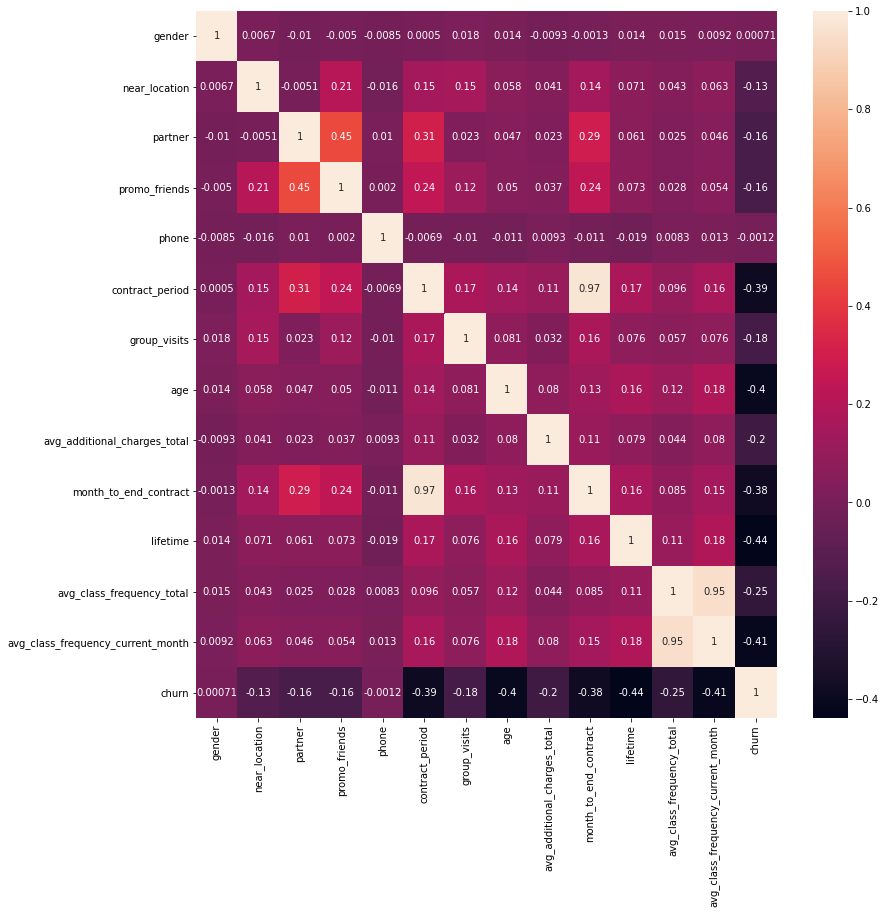

In [91]:
plt.figure(figsize = (13,13))
sns.heatmap(df.corr(), annot=True)
plt.show()

Secara matriks korelasi, kita dapat melihat bahwa korelasi positif yang kuat terdapat pada periode kontrak dengan sisa bulan sebelum kontrak berakhir dan juga antara frekuensi rata-rata kunjungan per minggu sepanjang bulan yang sedang berjalan dengan selama masa hidup (*lifetime*) pelanggan. Kemungkinan, pelanggan yang lebih sering mengunjungi tempat *fitness* dalam sebulan mungkin telah membentuk kebiasaan rutin untuk menjaga kesehatan dan kebugaran mereka. Mereka kemungkinan memiliki tujuan jangka panjang untuk menjaga kebugaran dan kesehatan mereka dan secara konsisten melakukan kunjungan selama masa hidup pelanggan.

Selain itu, terdapat juga beberapa korelasi negatif seperti contohnya antara waktu (dalam bulan) sejak kunjungan pertama pelanggan ke pusat kebugaran (*lifetime*) dengan kecenderungan terjadinya pelanggan *churn*. Artinya, semakin lama waktu seseorang menjadi pelanggan di sebuah pusat kebugaran, maka kecenderungan ia akan menjadi *customer churn* kemungkinan semakin mengecil atau berkurang.

### Kesimpulan dan Langkah Selanjutnya

Setelah melakukan analisa data, maka kita dapat menarik kesimpulan:

1. Setelah mempelajari nilai rata-rata dan standar deviasi pada dataset yang kita miliki, ternyata terdapat perbedaan skala yang cukup signifikan pada distribusi datanya. Ketika nilai standar deviasi dari kolom atau fitur dalam dataset memiliki variasi yang signifikan dalam skala dan rentang nilai, ini menunjukkan bahwa distribusi data di kolom tersebut sangat bervariasi. Sebelum melakukan pemodelan, kita perlu melakukan analisis lebih lanjut untuk melihat apakah nilai yang tinggi pada suatu fitur dapat mengindikasikan bahwa fitur-fitur tersebut mungkin memiliki pengaruh yang lebih besar dan berkaitan dalam memprediksi *churn*.

2. Setelah mempelajari tabel dan grafik visualisasi distribusi fitur antara kelompok *churn* dan *non-churn*, kita dapat melihat bahwa terdapat beberapa fitur yang mempengaruhi apakah seorang pelanggan cenderung menjadi *customer churn* atau tidak, seperti:
 * Lokasi: pelanggan cenderung memilih tempat *fitness* yang lokasinya dekat dengan mereka dibandingkan yang jauh.
 * Partner: adanya teman membuat pelanggan lebih bertahan lama dan tidak *churn*.
 * Promo mengajak teman: program promo ajak teman rupanya cukup berdampak pada kesetiaan pelanggan pada suatu pusat kebugaran.
 * Periode kontrak dan *Lifetime*: rata-rata pelanggan *churn* hanya bertahan selama 1 bulan saja, sedangkan biasanya yang sudah berlangganan selama 4 bulan ke atas lebih bertahan lama 
 * Sesi kelompok: pelanggan tidak *churn* lebih banyak mengikuti sesi kelompok
 * Frekuensi rata-rata kunjungan, baik selama *lifetime* maupun dalam sebulan: rata-rata frekuensi kunjungan pelanggan *non-churn* (rata-rata 2 kunjungan) lebih tinggi dibandingkan dengan pelanggan *churn* (rata-rata 1 kunjungan)
 * Jumlah total uang yang dikeluarkan: pelanggan *non-churn* cenderung menghabiskan lebih banyak uang di tempat fitness dibandingkan pelanggan *churn*
 
3. Secara matriks korelasi, kita dapat melihat bahwa terdapat korelasi positif dan korelasi negatif antar fitur. Contoh korelasi positif yang kuat terjadi antara frekuensi rata-rata kunjungan per minggu sepanjang bulan yang sedang berjalan dengan selama masa hidup (*lifetime*) pelanggan. Kemungkinan, pelanggan yang lebih sering mengunjungi tempat *fitness* dalam sebulan mungkin telah membentuk kebiasaan rutin untuk menjaga kesehatan dan kebugaran mereka. Mereka kemungkinan memiliki tujuan jangka panjang untuk menjaga kebugaran dan kesehatan mereka dan secara konsisten melakukan kunjungan selama masa hidup pelanggan. Sedangkan contoh korelasi negatif terjadi antara waktu (dalam bulan) sejak kunjungan pertama pelanggan ke pusat kebugaran(*lifetime*) dengan kecenderungan terjadinya pelanggan *churn*. Artinya, semakin lama waktu seseorang menjadi pelanggan di sebuah pusat kebugaran, maka kecenderungan ia akan menjadi *customer churn* kemungkinan semakin mengecil atau berkurang.

## Penerapan *Machine Learning*

Setelah melakukan tahap analisa data, kita akan mencoba membuat prediksi mengenai probabilitas *churn* bagi setiap pelanggan di pusat kebugaran Model Fitness untuk bulan berikutnya, dan juga melihat karakteristik setiap kelompok klaster untuk mengurangi *churn*.

Untuk itu, kita akan melakukan *training* dan *validation*, kemudian melatih model dan menetapkan model yang terbaik, dan juga pengklasteran.

### *Train Set* dan *Validation Set* 

In [92]:
X = df.drop(columns = ['churn'])
y = df['churn']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state = 42)

### Melatih Model

#### Regresi Logistik

In [93]:
lr_model = LogisticRegression(random_state = 42)

In [94]:
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [95]:
y_proba_lr = lr_model.predict_proba(X_val)
y_pred_lr = lr_model.predict(X_val)

In [96]:
print('Accuracy score for logistic regression is: {:.2f}'.format(accuracy_score(y_val, y_pred_lr)))
print('Precision score for logistic regression is: {:.2f}'.format(precision_score(y_val, y_pred_lr)))
print('Recall score for logistic regression is: {:.2f}'.format(recall_score(y_val, y_pred_lr)))      

Accuracy score for logistic regression is: 0.91
Precision score for logistic regression is: 0.86
Recall score for logistic regression is: 0.77


#### *Random Forest*

In [97]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 42)

In [98]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [99]:
y_proba_rf = rf_model.predict_proba(X_val)
y_pred_rf = rf_model.predict(X_val)

In [100]:
print('Accuracy score for logistic regression is: {:.2f}'.format(accuracy_score(y_val, y_pred_rf)))
print('Precision score for logistic regression is: {:.2f}'.format(precision_score(y_val, y_pred_rf)))
print('Recall score for logistic regression is: {:.2f}'.format(recall_score(y_val, y_pred_rf)))      

Accuracy score for logistic regression is: 0.91
Precision score for logistic regression is: 0.85
Recall score for logistic regression is: 0.78


Setelah kita membuat model klasifikasi biner untuk pelanggan dan melatih model dengan menggunakan metode regresi logistik serta *random forest*, kita mendapatkan hasil yang tidak jauh berbeda untuk kedua model tersebut. Hanya terdapat sedikit perbedaan pada nilai-nilai metrik yang kita gunakan.

Jika kita mengutamakan *recall*, yaitu kemampuan model dalam mendeteksi pelanggan *churn* atau pelanggan yang akan keluar, maka model *random forest* dengan *recall* sebesar 0.78 sedikit lebih unggul dibandingkan model regresi logistik dengan *recall* sebesar 0.77.

Namun, mempertimbangkan perbedaannya yang tidak signifikan, dapat dikatakan kedua model memberikan hasil yang hampir sama baiknya.

### Membuat Klaster Pengguna

#### Standardisasi Data

Seperti sudah dijelaskan pada tahap sebelumnya, ketika kita menganalisis nilai rata-rata dan standar deviasi data kita, terdapat perbedaan skala yang cukup signifikan di antara fitur-fitur yang kita miliki. Kemungkinan, perbedaan tersebut dapat mempengaruhi pemodelan yang akan kita lakukan, khususnya ketika akan melakukan pengklasteran. Misalnya, jika satu fitur memiliki rentang nilai yang jauh lebih besar daripada fitur lainnya, hal ini dapat mengakibatkan kontribusi yang tidak seimbang dalam perhitungan jarak dan menghasilkan klaster yang tidak optimal.

Maka, kita perlu melakukan standarisasi data, dengan tujuan kita dapat menyeragamkan skala dan variabilitas antara fitur atau seperti menyamaratakan nilai standar deviasinya, sehingga menghilangkan masalah perbedaan skala dalam analisis klastering. 

Dengan menggunakan data yang telah distandarisasi, hasil klastering menjadi lebih konsisten dan juga membantu menghindari kesalahan interpretasi.

In [101]:
sc = StandardScaler()
x_sc = sc.fit_transform(df.drop(columns = ['churn']))

#### Jumlah Klaster yang Dapat Dipilih

In [102]:
linked = linkage(x_sc, method = 'ward')

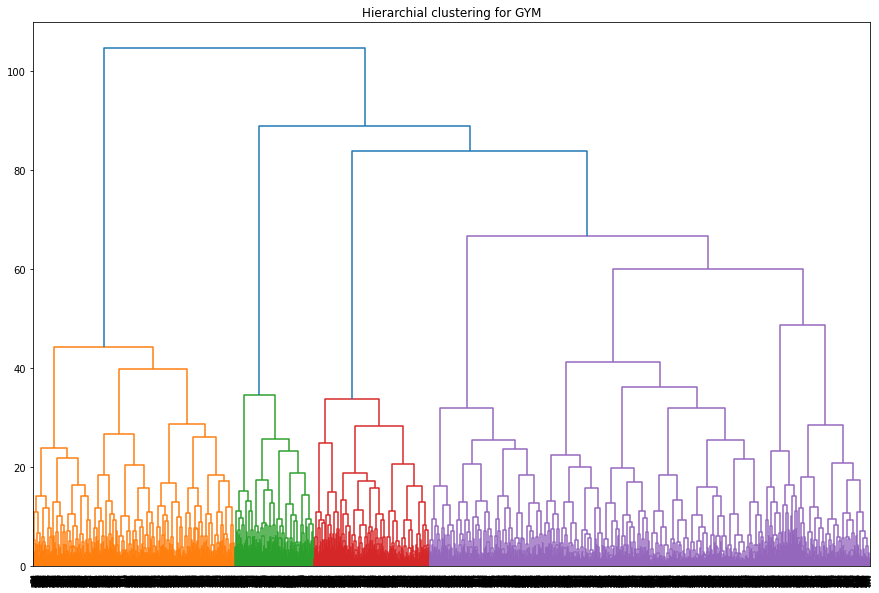

In [103]:
plt.figure(figsize = (15, 10))
dendrogram(linked,
          orientation = 'top')
plt.title('Hierarchial clustering for GYM')
plt.show()

Jumlah kelompok optimal yang disarankan (4) berkorelasi dengan empat warna berbeda pada grafik.

#### Nilai Rata-rata dan Distribusi Fitur untuk Semua Klaster

In [104]:
km = KMeans (n_clusters = 5)
labels = km.fit_predict(df.drop(columns = ['churn']))

In [105]:
df['cluster_km'] = labels

In [106]:
df.groupby(['cluster_km']).count()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,706,706,706,706,706,706,706,706,706,706,706,706,706,706
1,1029,1029,1029,1029,1029,1029,1029,1029,1029,1029,1029,1029,1029,1029
2,962,962,962,962,962,962,962,962,962,962,962,962,962,962
3,1032,1032,1032,1032,1032,1032,1032,1032,1032,1032,1032,1032,1032,1032
4,271,271,271,271,271,271,271,271,271,271,271,271,271,271


In [107]:
df.groupby(['cluster_km']).mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,0.521246458923513,0.881019830028329,0.511331444759207,0.347025495750708,0.898016997167139,5.400849858356940,0.433427762039660,29.344192634560905,250.984766730779967,5.001416430594901,4.169971671388102,1.903480218190926,1.843255315387595,0.178470254957507
1,0.514091350826045,0.839650145772595,0.451895043731778,0.279883381924198,0.897959183673469,4.301263362487853,0.407191448007775,28.973760932944607,105.932804130992963,3.996112730806608,3.544217687074830,1.852564173537317,1.708263839016004,0.334305150631681
2,0.511434511434511,0.844074844074844,0.495841995841996,0.320166320166320,0.902286902286902,4.755717255717256,0.423076923076923,29.401247401247403,174.873445094752583,4.376299376299376,3.749480249480249,1.895200425454709,1.785569339492693,0.226611226611227
3,0.508720930232558,0.824612403100775,0.488372093023256,0.293604651162791,0.907945736434108,4.198643410852713,0.387596899224806,28.908914728682170,35.600721999931416,3.855620155038760,3.394379844961240,1.836754913162511,1.692640823374053,0.349806201550388
4,0.468634686346863,0.856088560885609,0.516605166051661,0.332103321033210,0.926199261992620,5.822878228782288,0.431734317343173,29.845018450184501,356.481960107734210,5.383763837638377,4.420664206642066,2.019259785446184,2.009381958807865,0.044280442804428


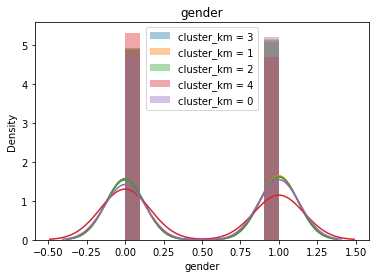

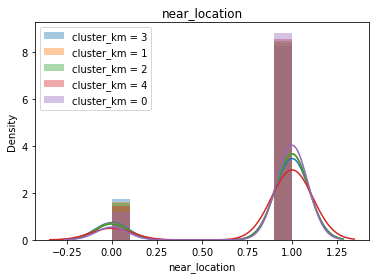

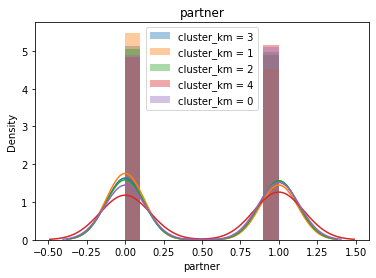

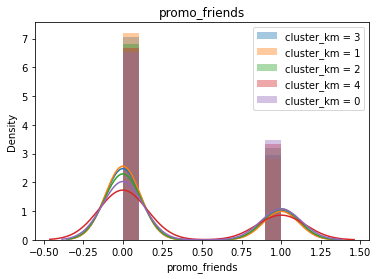

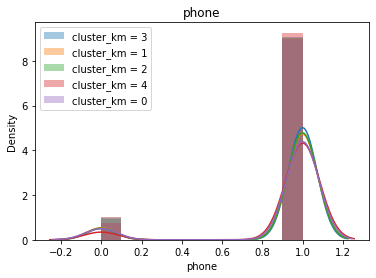

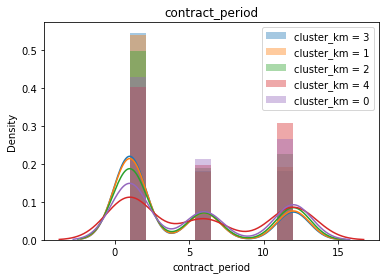

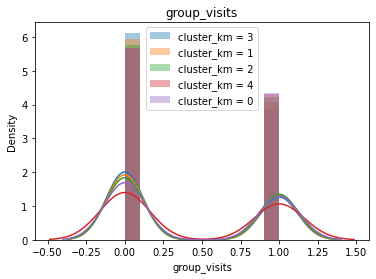

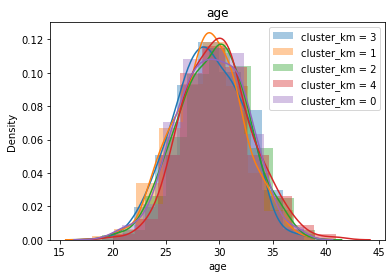

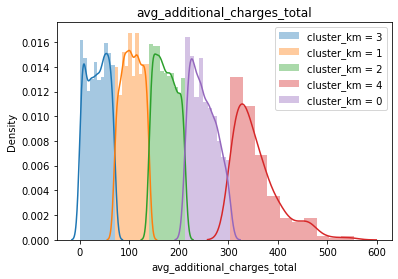

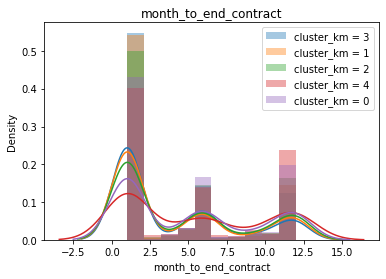

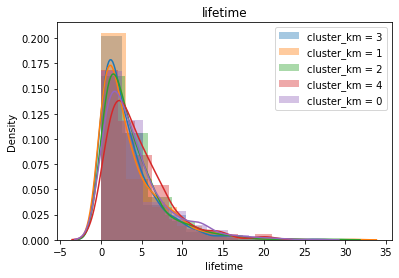

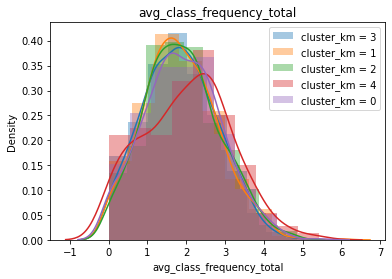

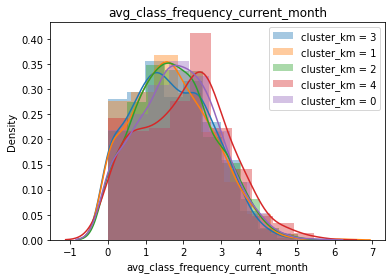

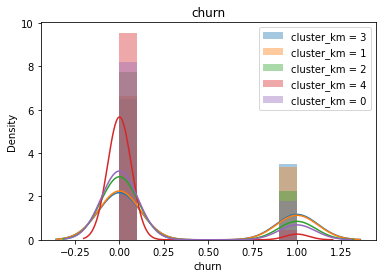

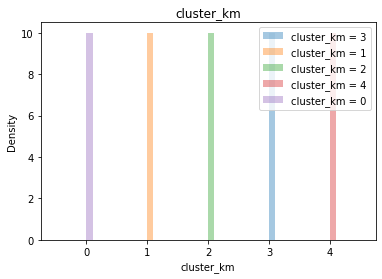

In [108]:
feat_hist(df, 'cluster_km', df.columns)

Melalui grafik di atas, dapat kita lihat bahwa terdapat beberapa variasi terhadap fitur dari klaster-klaster yang kita miliki.

Contohnya untuk fitur `contract_period` dan `month_to_end_contract` rata-rata kluster hanya mengambil *membership* sekitar 1 bulan saja (seperti klaster 1), namun untuk klaster 3, sepertinya mereka adalah para pelanggan yang paling loyal karena bertahan lebih dari 10 bulan. Hal menarik lainnya dapat kita lihat pada fitur `avg_additional_charges_total` dimana klaster 3 paling banyak mengeluarkan uang untuk membayar layanan lainnya di pusat kebugaran tersebut, sedangkan yang paling minim mengeluarkan uang adalah klaster 1.

#### Tingkat *Churn* Setiap Klaster

In [109]:
df.groupby(['cluster_km']).mean()['churn']

cluster_km
0    0.178470254957507
1    0.334305150631681
2    0.226611226611227
3    0.349806201550388
4    0.044280442804428
Name: churn, dtype: float64

Setelah kita menghitung tingkat *churn* untuk setiap klaster, dapat dilihat bahwa klaster no 3 dengan nilai terendah 0.04, memang merupakan klaster pelanggan yang cenderung akan tetap setia, dan klaster 1 dengan nilai tertinggi 0.35, adalah yang cenderung akan menjadi *customer churn* atau pelanggan yang akan pergi.

### Kesimpulan

Setelah melatih model dan melakukan pengklasteran, maka dapat diambil kesimpulan:

1. Setelah membuat model klasifikasi biner untuk pelanggan dan melatih model dengan menggunakan metode regresi logistik serta *random forest*, kita mendapatkan hasil yang tidak jauh berbeda untuk kedua model tersebut. Hanya terdapat sedikit perbedaan pada nilai-nilai metrik yang kita gunakan. Jika kita mengutamakan *recall*, yaitu kemampuan model dalam mendeteksi pelanggan *churn* atau pelanggan yang akan keluar, maka model *random forest* lebih unggul. Namun, mempertimbangkan perbedaannya yang tidak signifikan, dapat dikatakan kedua model memberikan hasil yang sama baiknya.

2. Seperti sudah dijelaskan pada tahap sebelumnya, ketika kita menganalisis nilai rata-rata dan standar deviasi data kita, terdapat perbedaan skala yang cukup signifikan di antara fitur-fitur yang kita miliki. Kemungkinan, perbedaan tersebut dapat mempengaruhi pemodelan yang akan kita lakukan, khususnya ketika akan melakukan pengklasteran. Maka, kita perlu melakukan standarisasi data, dengan tujuan kita dapat menyeragamkan skala dan variabilitas antara fitur atau seperti menyamaratakan nilai standar deviasinya, sehingga menghilangkan masalah perbedaan skala dalam analisis klastering. Dengan menggunakan data yang telah distandarisasi, jumlah kelompok optimal yang disarankan adalah 4 kelompok.

3. Melalui grafik distribusi fitur untuk setiap klaster, dapat kita lihat bahwa terdapat beberapa variasi terhadap fitur dari klaster-klaster yang kita miliki. Contohnya untuk fitur `contract_period` dan `month_to_end_contract` rata-rata kluster hanya mengambil *membership* sekitar 1 bulan saja (seperti klaster 1), namun untuk klaster 3, sepertinya mereka adalah para pelanggan yang paling loyal karena bertahan lebih dari 10 bulan. Selain itu, pada fitur `avg_additional_charges_total` dimana klaster 3 paling banyak mengeluarkan uang untuk membayar layanan lainnya di pusat kebugaran tersebut, sedangkan yang paling minim mengeluarkan uang adalah klaster 1.

4. Setelah kita menghitung tingkat *churn* untuk setiap klaster, dimana nilai terendah menunjukkan kemungkinan tidak *churn*, maka klaster pelanggan no 3 merupakan yang cenderung akan tetap setia, dan klaster 1 yang memiliki nilai tertinggi, adalah yang cenderung akan menjadi *customer churn* atau pelanggan yang akan pergi.

## Kesimpulan Umum

Kita telah mencoba mempelajari dan menganalisa dataset mengenai pelanggan pusat kebugaran Model Fitness, dan menarik kesimpulan sebagai berikut:

1. Dataset kita memiliki 4000 baris dan 14 kolom. Tidak terdapat nilai yang hilang maupun data yang terduplikasi, namun ada sedikit masalah dengan gaya penulisan nama kolom yang tidak konsisten, sehingga telah dilakukan perbaikan dengan membuat semua nama kolom menggunakan huruf kecil saja.

2. Setelah tahap pra-pemrosesan data, kita melakukan analisa data dengan mempelajari nilai rata-rata dan standar deviasi pada dataset yang kita miliki, ternyata terdapat perbedaan skala yang cukup signifikan pada distribusi datanya, sehingga kita perlu melakukan analisa lebih lanjut mengenai fitur-fitur yang ada, yaitu dengan mempelajari distribusi fitur antara kelompok *churn* dan *non-churn*.

3. Setelah mempelajari tabel dan grafik visualisasi distribusi fitur antara kelompok *churn* dan *non-churn*, kita dapat melihat bahwa terdapat beberapa fitur yang mempengaruhi apakah seorang pelanggan cenderung menjadi *customer churn* atau tidak, seperti:

 * Lokasi: pelanggan cenderung memilih tempat *fitness* yang lokasinya dekat dengan mereka dibandingkan yang jauh.
 * Partner: adanya teman membuat pelanggan lebih bertahan lama dan tidak *churn*.
 * Promo mengajak teman: program promo ajak teman rupanya cukup berdampak pada kesetiaan pelanggan pada suatu pusat kebugaran.
 * Periode kontrak dan *Lifetime*: rata-rata pelanggan *churn* hanya bertahan selama 1 bulan saja, sedangkan biasanya yang sudah berlangganan selama 4 bulan ke atas lebih bertahan lama 
 * Sesi kelompok: pelanggan non *churn* lebih banyak mengikuti sesi kelompok
 * Frekuensi rata-rata kunjungan, baik selama *lifetime* maupun dalam sebulan: rata-rata frekuensi kunjungan pelanggan *non-churn* (rata-rata 2 kunjungan) lebih tinggi dibandingkan dengan pelanggan *churn* (rata-rata 1 kunjungan)
 * Jumlah total uang yang dikeluarkan: pelanggan *non-churn* cenderung menghabiskan lebih banyak uang di tempat fitness dibandingkan pelanggan *churn*
 
4. Secara matriks korelasi, kita dapat melihat bahwa terdapat korelasi positif dan korelasi negatif antar fitur. Contoh korelasi positif yang kuat terjadi antara frekuensi rata-rata kunjungan per minggu sepanjang bulan yang sedang berjalan dengan selama masa hidup (*lifetime*) pelanggan. Kemungkinan, pelanggan yang lebih sering mengunjungi tempat *fitness* dalam sebulan mungkin telah membentuk kebiasaan rutin untuk menjaga kesehatan dan kebugaran mereka, sehingga secara konsisten dapat melakukan kunjungan selama masa hidup pelanggan. Sedangkan contoh korelasi negatif terjadi antara waktu (dalam bulan) sejak kunjungan pertama pelanggan ke pusat kebugaran(*lifetime*) dengan kecenderungan terjadinya pelanggan *churn*. Artinya, semakin lama waktu seseorang menjadi pelanggan di sebuah pusat kebugaran, maka kecenderungan ia akan menjadi *customer churn* kemungkinan semakin mengecil atau berkurang.

5. Kita mencoba melatih model dan memilih model terbaik untuk memprediksi tingkat *churn* pada pelanggan, dengan menggunakan metode regresi logistik serta *random forest*. Hasil yang didapatkan tidak jauh berbeda untuk kedua model tersebut. Hanya terdapat sedikit perbedaan pada nilai-nilai metrik yang kita gunakan. Jika kita mengutamakan *recall*, yaitu kemampuan model dalam mendeteksi pelanggan *churn* atau pelanggan yang akan keluar, maka model *random forest* lebih unggul. Namun, mempertimbangkan perbedaannya yang tidak signifikan, dapat dikatakan kedua model memberikan hasil yang sama baiknya.

6. Pada tahap sebelumnya, kita mengetahui bahwa terdapat perbedaan skala yang cukup signifikan di antara fitur-fitur yang kita miliki. Kemungkinan, perbedaan tersebut dapat mempengaruhi pemodelan yang akan kita lakukan, khususnya ketika akan melakukan pengklasteran. Maka, kita melakukan standarisasi data, dengan tujuan kita dapat menyeragamkan skala dan variabilitas antara fitur atau seperti menyamaratakan nilai standar deviasinya, sehingga menghilangkan masalah perbedaan skala dalam analisis klastering. Dengan menggunakan data yang telah distandarisasi, jumlah kelompok optimal yang disarankan adalah 4 kelompok.

7. Melalui grafik distribusi fitur untuk setiap klaster, dapat kita lihat bahwa terdapat beberapa variasi terhadap fitur dari klaster-klaster yang kita miliki. Contohnya untuk fitur `contract_period` dan `month_to_end_contract` rata-rata kluster hanya mengambil *membership* sekitar 1 bulan saja (seperti klaster 1), namun untuk klaster 3, sepertinya mereka adalah para pelanggan yang paling loyal karena bertahan lebih dari 10 bulan. Selain itu, pada fitur `avg_additional_charges_total` dimana klaster 3 paling banyak mengeluarkan uang untuk membayar layanan lainnya di pusat kebugaran tersebut, sedangkan yang paling minim mengeluarkan uang adalah klaster 1.

8. Pada tahap akhir, kita menghitung tingkat *churn* untuk setiap klaster, dimana nilai terendah menunjukkan kemungkinan tidak *churn*. Hasilnya, klaster pelanggan no 3 merupakan yang cenderung akan tetap setia (dengan nilai terendah yaitu 0.04), dan klaster 1 yang memiliki nilai tertinggi (0.35), adalah yang cenderung akan menjadi *customer churn* atau pelanggan yang akan pergi.


Dengan demikian, kita dapat melihat bahwa tingkat *churn* dapat dipengaruhi berbagai fitur seperti lokasi, *partner*, promo, waktu selama pelanggan menjadi *membership*, jumlah pengeluaran dan juga rata-rata kunjungan. Kita juga dapat melihat karakteristik pelanggan *churn* melalui fitur-fitur tersebut.
Rata-rata pelanggan yang hanya mendaftar *membership* 1 bulan saja dan tidak kembali kemungkinan besar merupakan *churn*. Kebanyakan dari mereka juga biasanya lokasinya jauh dari pusat kebugaran, tidak memiliki teman dalam berolahraga, dan mengeluarkan biaya yang minim atau tidak sama sekali untuk layanan lainnya.

Pusat Kebugaran Model Fitness mungkin dapat menerapkan beberapa strategi retensi pelanggan, seperti:
1. Membangun cabang di berbagai lokasi, sehingga semakin banyak pelanggan yang dapat bergabung dari berbagai wilayah dan memperkecil jarak pelanggan untuk pergi ke pusat kebugaran yang jauh. Tingkatkan kehadiran pemasaran di sekitar area baru dan tawarkan promosi khusus untuk menarik pelanggan baru seperti memberikan diskon khusus baik bagi pelanggan yang mengajak teman baru maupun bagi teman yang baru bergabung.
2. Memberikan promo untuk pelanggan yang langsung mendaftar 3 bulan, 6 bulan,dst., karena, biasanya pelanggan dapat bertahan lama jika mereka sudah berlangganan lebih dari 3 bulan. Tawarkan juga program loyalitas kepada pelanggan yang setia untuk memotivasi mereka agar tetap berlangganan dan terus menggunakan fasilitas gym.
3. Memberikan diskon atau promo untuk pelanggan yang melakukan transaksi pada layanan lain yang terdapat di pusat kebugaran, atau tawarkan paket khusus yang mencakup *membership* beserta layanan lainnya untuk menarik minat pelanggan mendaftar atau memperpanjang *membership* mereka.